In [1]:
import pandas as pd
import sqlite3

In [2]:
file_path = r"E:\DOWNLOADS_G\Tự học\DA momo\Test_momo\MoMo Talent 2024_DA_Case Study Round_Questions.xlsx"
transactions_df = pd.read_excel(file_path, sheet_name='Data Transactions')
commission_df = pd.read_excel(file_path, sheet_name='Data Commission')
user_info_df = pd.read_excel(file_path, sheet_name='Data User_Info')


In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          13495 non-null  int64 
 1   order_id         13495 non-null  int64 
 2   Date             13495 non-null  object
 3   Amount           13495 non-null  object
 4   Merchant_id      13495 non-null  int64 
 5   Purchase_status  2235 non-null   object
dtypes: int64(3), object(3)
memory usage: 632.7+ KB


In [8]:
transactions_df['Amount'] = pd.to_numeric(transactions_df['Amount'], errors='coerce')

# Data Processing

In [3]:
# Giả sử transactions_df là DataFrame của bạn
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], errors='coerce')
transactions_df['Date'] = transactions_df['Date'].dt.strftime('%Y-%m-%d')

In [4]:
# Giả sử transaction_df là DataFrame của bạn
unique_values = transactions_df['Date'].unique()
min_value = transactions_df['Date'].min()
max_value = transactions_df['Date'].max()
data_type = transactions_df['Date'].dtypes

print(f"Unique values: {unique_values}")
print(f"Min value: {min_value}")
print(f"Max value: {max_value}")
print(f"Data type: {data_type}")

Unique values: ['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30'
 '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04'
 '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09'
 '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14'
 '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19'
 '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24'
 '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29'
 '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05'
 '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10'
 '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14' '2020-03

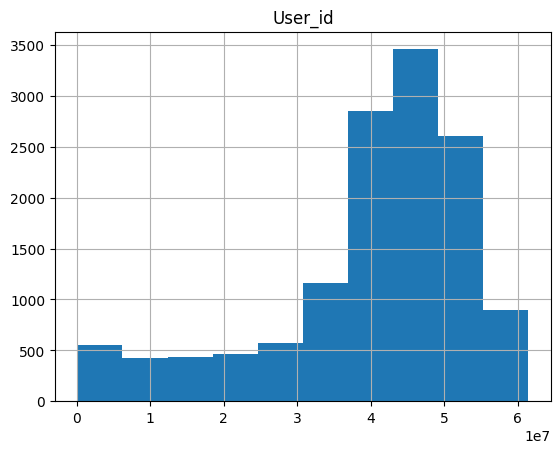

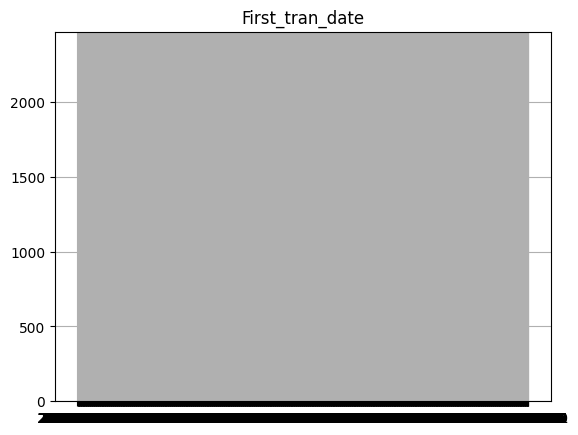

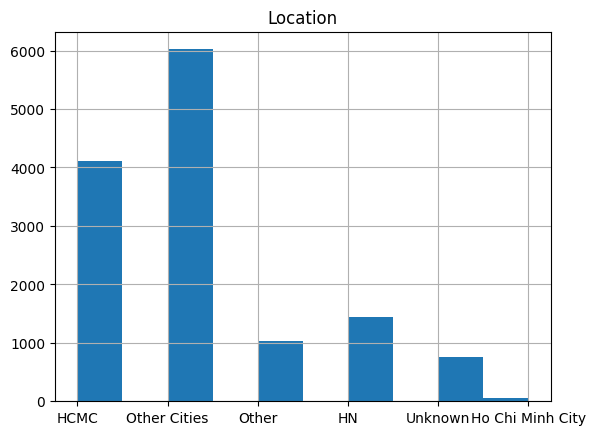

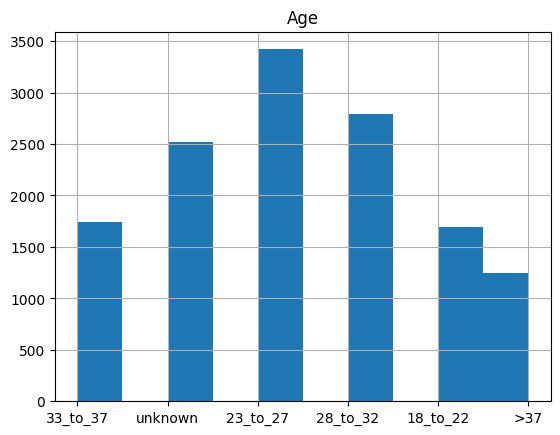

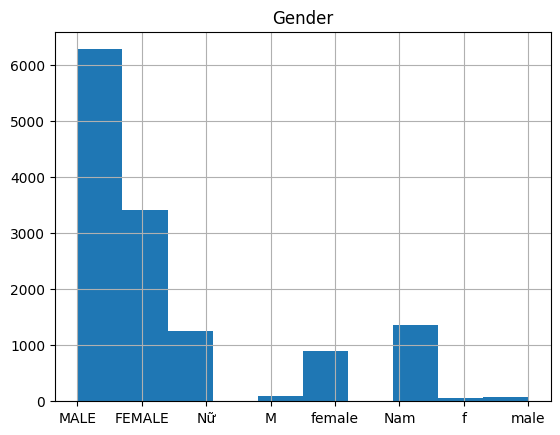

In [5]:
#Histogram all the columns
import matplotlib.pyplot as plt
for col in user_info_df.columns:
    user_info_df[col].hist()
    plt.title(col)
    plt.show()

<AxesSubplot:>

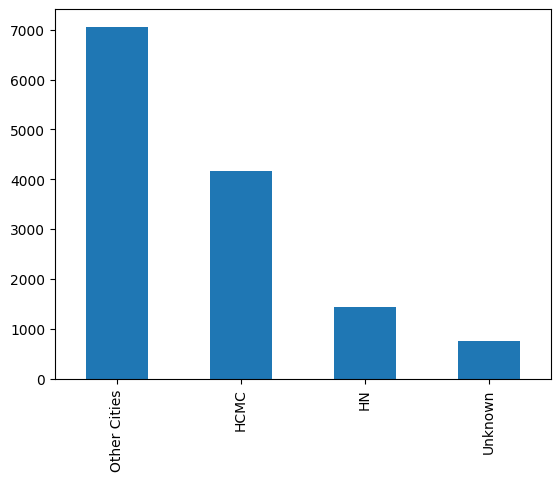

In [6]:
# Giả sử user_info_df là DataFrame của bạn
user_info_df['Location'] = user_info_df['Location'].replace({'Ho Chi Minh City': 'HCMC', 
                                                         'Other': 'Other Cities'})
user_info_df['Location'].value_counts().plot(kind='bar')

In [10]:
# Gender
user_info_df['Gender'] = user_info_df['Gender'].replace({'f': 'female', 
                                                         'FEMALE': 'female', 
                                                         'Nữ': 'female',
                                                         'MALE': 'male',
                                                         'Nam': 'male',
                                                         'm': 'male'})

In [8]:
# Xử lý cột Amount để chuyển đổi dấu phân cách hàng nghìn
transactions_df['Amount'] = transactions_df['Amount'].str.replace(',', '').astype(int)


# Part A

In [9]:
conn = sqlite3.connect('momo_data.db')

In [10]:
# Chuyển DataFrame thành bảng SQL
transactions_df.to_sql('Transactions', conn, if_exists='replace', index=False)
commission_df.to_sql('Commission', conn, if_exists='replace', index=False)
user_info_df.to_sql('User_Info', conn, if_exists='replace', index=False)


13428

#### 1. Using data from the 'Commission' table, add a column 'Revenue' in the 'Transactions' table that displays MoMo's earned revenue for each order, and then calculate MoMo's total revenue in January 2020.


In [11]:
# 1. Thêm cột 'Revenue' vào bảng 'Transactions' và tính tổng doanh thu của MoMo trong tháng 1 năm 2020
query = '''
    SELECT T.*, (T.Amount * (C.Rate_pct / 100.00)) as revenue
    FROM Transactions T
    JOIN Commission C ON T.Merchant_id = C.Merchant_id
'''
transactions_with_revenue = pd.read_sql_query(query, conn)
transactions_with_revenue.to_sql('Transactions_with_Revenue', conn, if_exists='replace', index=False)

13495

In [12]:
query = '''
    SELECT SUM(revenue) as total_revenue
    FROM Transactions_with_Revenue
    WHERE strftime('%Y-%m', date) = '2020-01'
'''
total_revenue_jan_2020 = pd.read_sql_query(query, conn)
print('Total Revenue in January 2020:', total_revenue_jan_2020['total_revenue'].iloc[0])


Total Revenue in January 2020: 1409827.02


#### 2. What is MoMo's most profitable month?

In [13]:
query = '''
    SELECT strftime('%Y-%m', Date) as month, SUM(revenue) as total_revenue
    FROM Transactions_with_Revenue
    GROUP BY month
    ORDER BY total_revenue DESC
    LIMIT 1
'''
most_profitable_month = pd.read_sql_query(query, conn)
print('Most Profitable Month:', most_profitable_month['month'].iloc[0])
print('Revenue of Most Profitable Month:', most_profitable_month['total_revenue'].iloc[0])

Most Profitable Month: 2020-09
Revenue of Most Profitable Month: 1702200.0


#### 3. What day of the week does MoMo make the most money, on average? The least money?


In [14]:
query = '''
    SELECT strftime('%w', Date) as weekday, 
        AVG(revenue) as avg_revenue
    FROM Transactions_with_Revenue
    GROUP BY weekday
    ORDER BY avg_revenue DESC
'''
revenue_by_weekday = pd.read_sql_query(query, conn)
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print('Day with Most Revenue (on average):', days_of_week[int(revenue_by_weekday.iloc[0]['weekday'])])
print('Day with Least Revenue (on average):', days_of_week[int(revenue_by_weekday.iloc[-1]['weekday'])])
# print('Day with Most Revenue (on average):', revenue_by_weekday.iloc[0]['weekday'])
# print('Day with Least Revenue (on average):', revenue_by_weekday.iloc[-1]['weekday'])


Day with Most Revenue (on average): Wednesday
Day with Least Revenue (on average): Monday


#### 4. Combined with the 'User_Info' table, add columns: Age, Gender, Location, Type_user (New/Current) in 'Transactions' table and calculate the total number of new users in December 2020.

In [15]:
query = '''
    SELECT T.*, U.age, U.gender, U.location,
           CASE
               WHEN strftime('%Y-%m', T.Date) = strftime('%Y-%m', U.first_tran_date) THEN 'New'
               ELSE 'Current'
           END as type_user
    FROM Transactions_with_Revenue T
    JOIN User_Info U ON T.user_id = U.user_id
'''
transactions_with_user_info = pd.read_sql_query(query, conn)
transactions_with_user_info.to_sql('Transactions_with_User_Info', conn, if_exists='replace', index=False)

# Tính tổng số người dùng mới trong tháng 12 năm 2020
query = '''
    SELECT COUNT(DISTINCT user_id) as new_users
    FROM Transactions_with_User_Info
    WHERE strftime('%Y-%m', Date) = '2020-12' AND type_user = 'New'
'''
new_users_dec_2020 = pd.read_sql_query(query, conn)
print('Total New Users in December 2020:', new_users_dec_2020['new_users'].iloc[0])

Total New Users in December 2020: 72


In [16]:
import sqlite3
import pandas as pd

# Kết nối đến cơ sở dữ liệu SQLite
conn = sqlite3.connect('momo_data.db')

# Lấy danh sách các bảng trong cơ sở dữ liệu
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = res.fetchall()

# In thông tin của từng bảng
for table in tables:
    table = table[0]
    df = pd.read_sql_query(f"SELECT * from {table}", conn)
    print(f"Table: {table}")
    print(df.head())  # In 5 dòng đầu tiên của mỗi bảng
    print("\n")

# Đóng kết nối
conn.close()

Table: Transactions
    user_id    order_id        Date  Amount  Merchant_id Purchase_status
0  21269588  4169517626  2020-01-01   10000           13            None
1  28097592  4170276686  2020-01-01   20000           13            None
2  47435144  4166729310  2020-01-01   10000           12            None
3  29080935  4174460303  2020-01-01   10000           13            None
4  14591075  4168216749  2020-01-01   10000           12            None


Table: Commission
  Merchant_name  Merchant_id  Rate_pct
0       Viettel           12         2
1      Mobifone           13         3
2     Vinaphone           14         4
3  Vietnamobile           15         4
4       Gmobile           16         4


Table: User_Info
    User_id First_tran_date      Location       Age  Gender
0  41654498      2018-05-02          HCMC  33_to_37    male
1  51276281      2019-12-08  Other Cities   unknown    male
2  49152375      2019-12-20  Other Cities  23_to_27    male
3   5971050      2019-08-01  